# Neural Network

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [111]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [112]:
%run data_evaluation.ipynb

### Imports

In [113]:
import numpy as np
import pandas as pd

from keras import regularizers
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout    
from keras.callbacks import EarlyStopping

### Hyperparmeters

In [114]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = False
enable_feature_engineering_alco_smoking = False
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.05, 0.15)

### Get the data

In [115]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


## Model

### Create the model

In [116]:
classifier = Sequential()

classifier.add(Dense(x_train.shape[1], activation='tanh', input_shape=(x_train.shape[1],)))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))<
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [117]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training vs Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

In [118]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

history = classifier.fit(
    x_train.astype('float32'),
    y_train.astype('float32'),
    batch_size=128,
    epochs=100,
    validation_data=(x_val.astype('float32'), y_val.astype('float32')),
    callbacks=[early_stop]
)

plot_hist(history.history)

"""
x_train = x_train
y_train = y_train

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle = True)
for train_index, test_index in kf.split(x_train):
    x_fold_train, x_fold_val = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    history = classifier.fit(
        x_fold_train.astype('float32'),
        y_fold_train.astype('float32'),
        batch_size=64,
        epochs=10,
        validation_data=(x_fold_val.astype('float32'), y_fold_val.astype('float32'))
    )
    
    plot_hist(history.history)
    
"""

Epoch 1/10
744/744 [==============================] - 5s 7ms/step - loss: 0.5885 - accuracy: 0.6929 - val_loss: 0.5632 - val_accuracy: 0.7124
Epoch 2/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5646 - accuracy: 0.7195 - val_loss: 0.5561 - val_accuracy: 0.7274
Epoch 3/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5593 - accuracy: 0.7225 - val_loss: 0.5567 - val_accuracy: 0.7292
Epoch 4/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5563 - accuracy: 0.7247 - val_loss: 0.5526 - val_accuracy: 0.7262
Epoch 5/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5560 - accuracy: 0.7252 - val_loss: 0.5474 - val_accuracy: 0.7327
Epoch 6/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5531 - accuracy: 0.7263 - val_loss: 0.5473 - val_accuracy: 0.7315
Epoch 7/10
744/744 [==============================] - 5s 6ms/step - loss: 0.5527 - accuracy: 0.7257 - val_loss: 0.5504 - val_accuracy: 0.7338
Epoch 

## Evaluation

### Predict the test set

In [119]:
y_prob = classifier.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

### Apply the evaluation metrics

Accuracy Score:
0.7374470659407139

Precision Score:
0.7642752562225475

Recall Score:
0.6566037735849056

F1-Score:
0.706359945872801

Cost:
1414



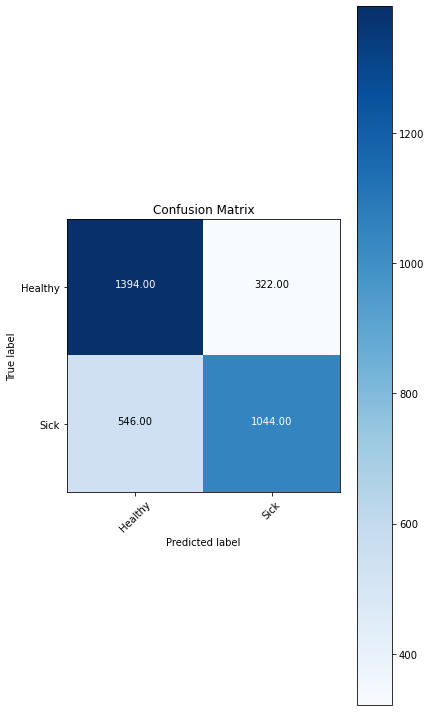

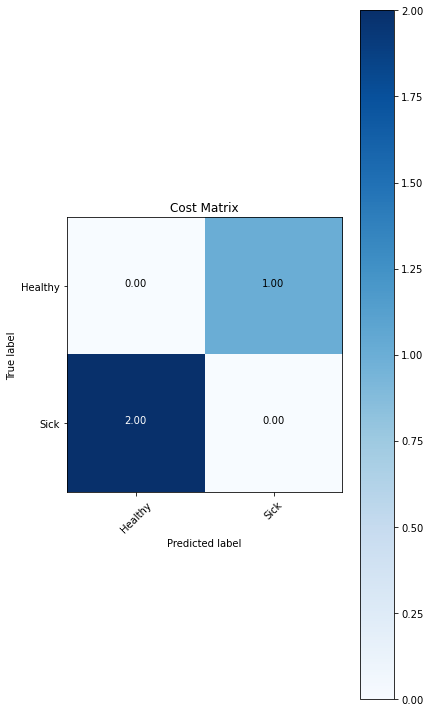

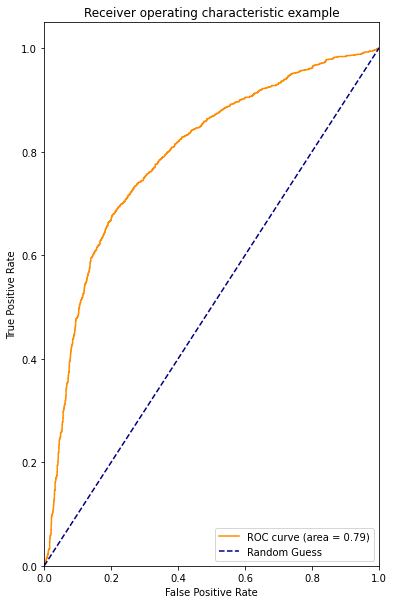


ROC Score:
0.7901066177009574


In [120]:
show_evaluation(y_test, y_pred, y_prob)

In [121]:
# Save predictions
method_name = 'Neural Network'
predicted_probabilities = y_prob.flatten()
savePredictedProbabilities(method_name, y_test, predicted_probabilities)